## Imports

In [0]:
import sys
# Allow absolute path imports.
sys.path.insert(0, '../..')

In [0]:
import pytorch_lightning as pl
import torch
import numpy as np
from matplotlib import pyplot as plt

from src.models.mnist_model import MnistModel

## Model Declaration

In [0]:
  model = MnistModel(dataset='mnist_rotated_translated',
                     width=28,
                     height=28,
                     n_channels=1,
                     n_hidden_units=500,
                     n_hidden=1,
                     n_unconstrained=2,
                     delta_x_prior=1.4,
                     theta_prior=0.7853981634,  # pi / 4
                     has_rotation=True,
                     has_translation=True)

## Training
Prepare to wait :)

In [0]:
trainer = pl.Trainer(max_epochs=50,
                     checkpoint_callback=False,
                     logger=False,
                     early_stop_callback=False,
                     gpus=int(torch.cuda.is_available()))
trainer.fit(model)

## Plot ELBO

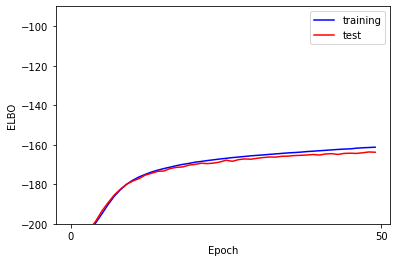

In [32]:
fig, ax = plt.subplots()
ax.plot(- np.array(model.log['training']), 'b', label='training')
ax.plot(- np.array(model.log['test']), 'r', label='test')

ax.set_xlabel('Epoch')
ax.set_ylabel('ELBO')
ax.set_xticks([0, 50])
ax.set_yticks([-200, -180, -160, -140, -120, -100])
ax.set_ylim([-200, -90])
ax.legend();

## Sample the Latent Space

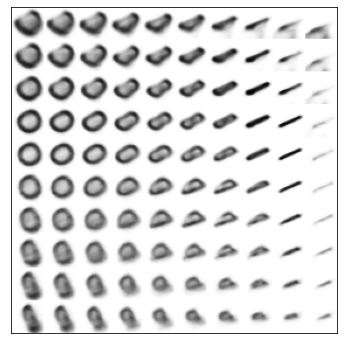

In [28]:
model.eval().cpu()

img = torch.empty((280, 280))
grid_x = np.linspace(-2, 2, 10)
grid_y = np.linspace(-2, 2, 10)[::-1]

for i, yi in enumerate(grid_y):
  for j, xi in enumerate(grid_x):
    z_sample = torch.tensor([[0, 0, 0, xi, yi]]).float()
    x_decoded = model.decode(z_sample).view(28, 28)
    img[28 * i:28 * (i + 1), 28 * j:28 * (j + 1)] = x_decoded

# Invert black and white.
img = -(img - 1).detach()

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img, cmap='gray')
ax.set_xticks([])
ax.set_yticks([]);